In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# stop warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
sys.path.append('../scripts')

In [6]:
# Load the historical bnd data
bnd_data = pd.read_csv('../data/cleaned_BND_data.csv')

# Display the first few rows to understand its structure
bnd_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,63.358780,82.650002,82.690002,82.419998,82.430000,2218800
1,2015-01-05 00:00:00+00:00,63.542706,82.889999,82.919998,82.699997,82.739998,5820100
2,2015-01-06 00:00:00+00:00,63.726700,83.129997,83.379997,83.029999,83.029999,3887600
3,2015-01-07 00:00:00+00:00,63.765057,83.180000,83.279999,83.050003,83.139999,2433400
4,2015-01-08 00:00:00+00:00,63.665421,83.050003,83.110001,82.970001,83.110001,1873400


In [8]:
# Load the historical spy data
spy_data = pd.read_csv('../data/cleaned_SPY_data.csv')
spy_data.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
1,2015-01-05 00:00:00+00:00,170.046326,201.720001,204.369995,201.350006,204.169998,169632600
2,2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
3,2015-01-07 00:00:00+00:00,170.543732,202.309998,202.720001,200.880005,201.419998,125346700
4,2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [9]:
# Convert 'Date' column to datetime format
bnd_data['Date'] = pd.to_datetime(bnd_data['Date'])

# Set 'Date' as the index
bnd_data.set_index('Date', inplace=True)

# Verify the data after setting the index
bnd_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358780,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542706,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726700,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765057,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665421,83.050003,83.110001,82.970001,83.110001,1873400


In [10]:
# Convert 'Date' column to datetime format
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

# Set 'Date' as the index
spy_data.set_index('Date', inplace=True)

# Verify the data after setting the index
spy_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173782,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046326,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444672,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543732,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [11]:
# Check for missing values
missing_values = bnd_data.isnull().sum()

# Display the number of missing values for each column
missing_values

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [12]:
# Check for missing values
missing_values = spy_data.isnull().sum()

# Display the number of missing values for each column
missing_values

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [13]:
bnd_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [14]:
spy_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

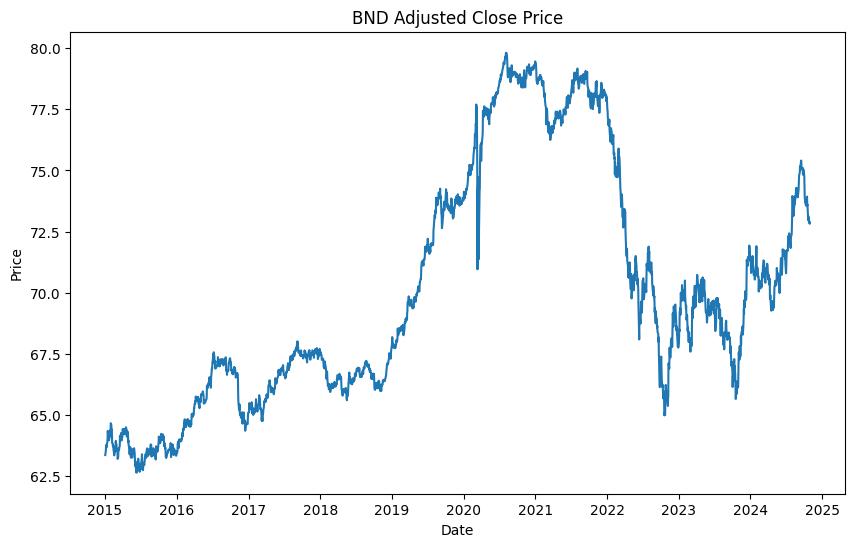

In [15]:
# Plot adjusted close prices
plt.figure(figsize=(10, 6))
plt.plot(bnd_data['Adj Close'])
plt.title('BND Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

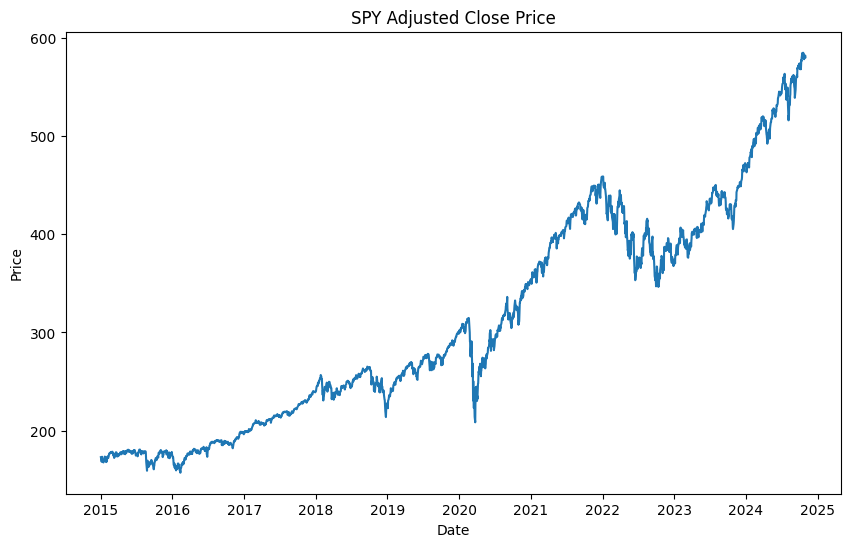

In [16]:
# Plot adjusted close prices
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Adj Close'])
plt.title('SPY Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(bnd_data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform Augmented Dickey-Fuller test
result = adfuller(spy_data['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4746540909185066
p-value: 0.5460102738161269
ADF Statistic: 1.013313020530928
p-value: 0.9944044491011045


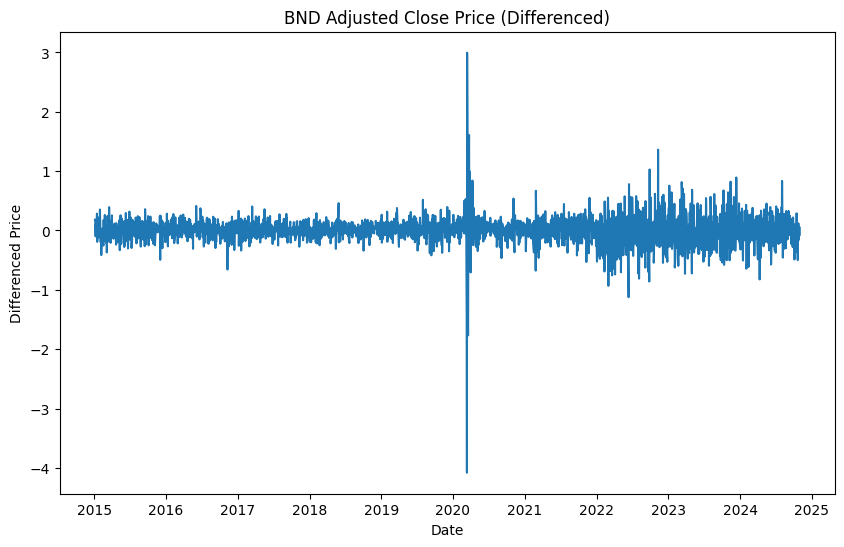

ADF Statistic: -9.742514793301364
p-value: 8.421946283104332e-17


In [18]:
# First differencing to make the series stationary
bnd_data['Adj Close Differenced'] = bnd_data['Adj Close'].diff().dropna()

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(bnd_data['Adj Close Differenced'])
plt.title('BND Adjusted Close Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

# Check stationarity again after differencing
result = adfuller(bnd_data['Adj Close Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

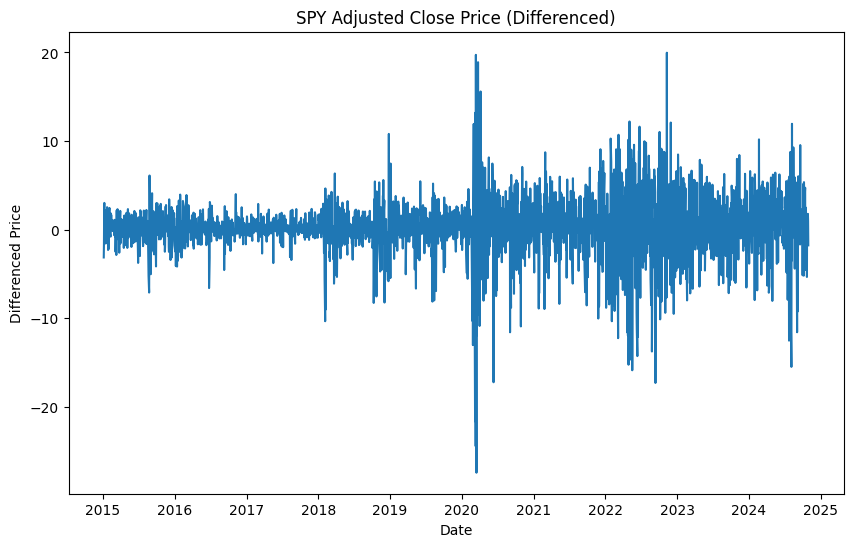

ADF Statistic: -10.169950287440544
p-value: 7.133088422974191e-18


In [19]:
# First differencing to make the series stationary
spy_data['Adj Close Differenced'] = spy_data['Adj Close'].diff().dropna()

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(spy_data['Adj Close Differenced'])
plt.title('SPY Adjusted Close Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

# Check stationarity again after differencing
result = adfuller(spy_data['Adj Close Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

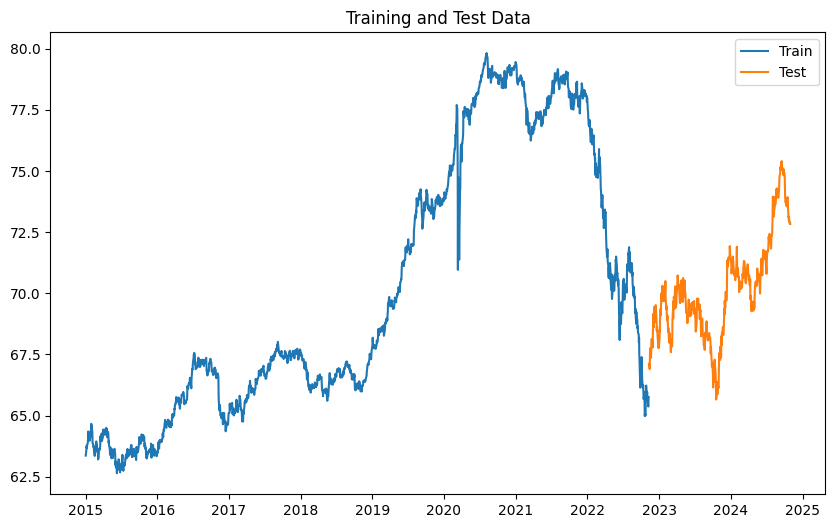

In [20]:
# Split the data into training and testing sets
train_size = int(len(bnd_data) * 0.8)  # 80% for training, 20% for testing
train, test = bnd_data['Adj Close'][:train_size], bnd_data['Adj Close'][train_size:]

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Training and Test Data')
plt.show()

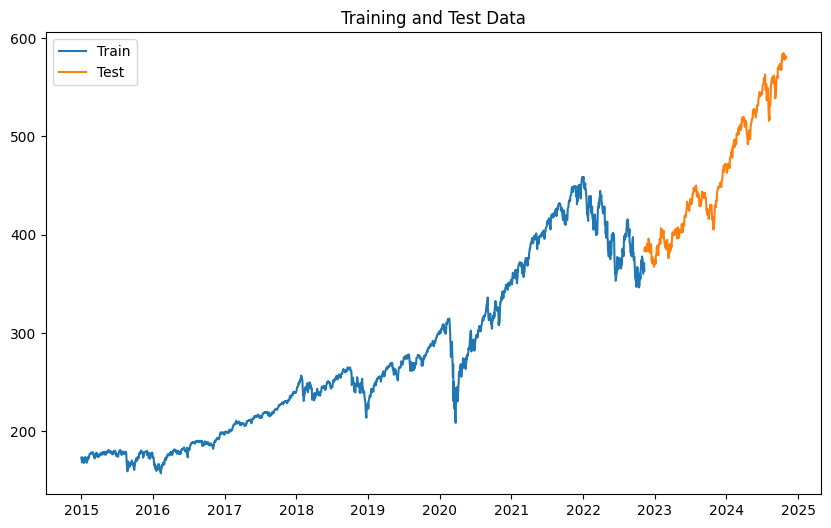

In [21]:
# Split the data into training and testing sets
train_size = int(len(spy_data) * 0.8)  # 80% for training, 20% for testing
train, test = spy_data['Adj Close'][:train_size], spy_data['Adj Close'][train_size:]

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Training and Test Data')
plt.show()

### BND Dataset 

Loaded ../data/cleaned_BND_data.csv
                           Adj Close      Close       High        Low  \
Date                                                                    
2015-01-02 00:00:00+00:00  63.358780  82.650002  82.690002  82.419998   
2015-01-05 00:00:00+00:00  63.542706  82.889999  82.919998  82.699997   
2015-01-06 00:00:00+00:00  63.726700  83.129997  83.379997  83.029999   
2015-01-07 00:00:00+00:00  63.765057  83.180000  83.279999  83.050003   
2015-01-08 00:00:00+00:00  63.665421  83.050003  83.110001  82.970001   

                                Open   Volume  
Date                                           
2015-01-02 00:00:00+00:00  82.430000  2218800  
2015-01-05 00:00:00+00:00  82.739998  5820100  
2015-01-06 00:00:00+00:00  83.029999  3887600  
2015-01-07 00:00:00+00:00  83.139999  2433400  
2015-01-08 00:00:00+00:00  83.110001  1873400  
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.46 sec
 ARIMA(0,2,0

d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be g

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - loss: 0.0600
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0010
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0012
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 9.0181e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0011
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 8.8498e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 9.4989e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 8.8713e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 8.5200e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.1877e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step


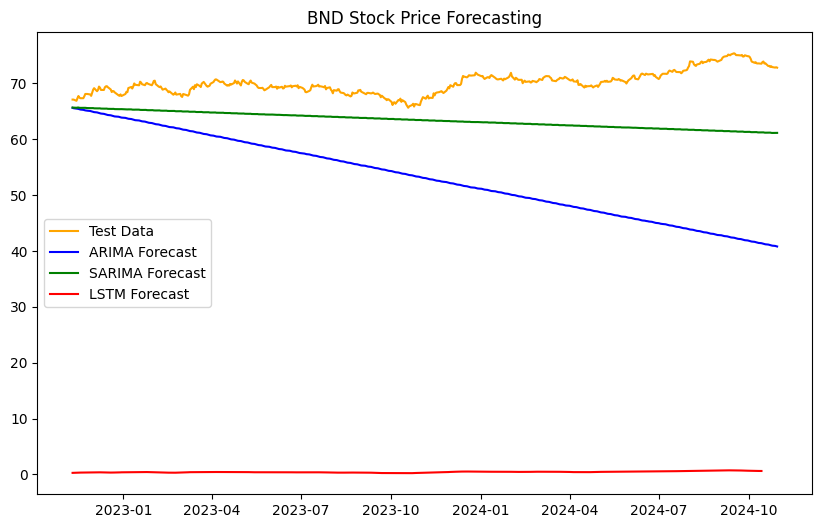

BND ARIMA MAE: 17.02171172949776, RMSE: 19.13788496799782, MAPE: 24.001636335210357%
BND SARIMA MAE: 6.716313843871203, RMSE: 7.408526530878904, MAPE: 9.462570736328466%
BND LSTM MAE: 0.02858403819557138, RMSE: 0.034801562664229665, MAPE: 7.167985438874146%
Models for BND saved successfully.



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import joblib

# Function to load data and prepare training/testing sets
def prepare_data(file_path, target_col='Adj Close', train_ratio=0.8):
    # Load the dataset
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    print(f"Loaded {file_path}")
    print(data.head())
    
    # Split the data into training and testing sets
    train_size = int(len(data) * train_ratio)
    train, test = data[target_col][:train_size], data[target_col][train_size:]
    return data, train, test

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

# Handle MAPE calculation to avoid NaN due to zero values
def custom_mape(y_true, y_pred, epsilon=1e-10):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = (np.abs(y_true) > epsilon)
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Function to train and evaluate models
# Function to train and evaluate models
def train_evaluate_models(train, test, data, file_prefix):
    # Fit ARIMA model
    arima_model = pm.auto_arima(train, seasonal=False, trace=True, stepwise=True)
    arima_forecast = arima_model.predict(n_periods=len(test))
    
    # Evaluate ARIMA model
    mae_arima = mean_absolute_error(test, arima_forecast)
    rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
    mape_arima = custom_mape(test, arima_forecast)

    # Fit SARIMA model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
    sarima_model_fit = sarima_model.fit()
    sarima_forecast = sarima_model_fit.forecast(steps=len(test))
    
    # Evaluate SARIMA model
    mae_sarima = mean_absolute_error(test, sarima_forecast)
    rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
    mape_sarima = custom_mape(test, sarima_forecast)

    # Normalize the data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))
    
    # Create sequences for LSTM model
    X, y = create_sequences(scaled_data)
    train_size = int(len(y) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Build and train LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    
    # Forecast using LSTM
    lstm_forecast = model.predict(X_test)
    lstm_forecast = lstm_forecast.flatten()  # Flatten to make it 1D array
    
    # Evaluate LSTM model
    mae_lstm = mean_absolute_error(y_test, lstm_forecast)
    rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_forecast))
    mape_lstm = custom_mape(y_test, lstm_forecast)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[len(train):], test, label='Test Data', color='orange')
    plt.plot(data.index[len(train):], arima_forecast, label='ARIMA Forecast', color='blue')
    plt.plot(data.index[len(train):], sarima_forecast, label='SARIMA Forecast', color='green')
    plt.plot(data.index[len(train):len(train)+len(lstm_forecast)], lstm_forecast, label='LSTM Forecast', color='red')
    plt.legend()
    plt.title(f'{file_prefix} Stock Price Forecasting')
    plt.show()

    # Print evaluation metrics
    print(f"{file_prefix} ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
    print(f"{file_prefix} SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}%")
    print(f"{file_prefix} LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")
    
    # Save models
    joblib.dump(arima_model, f'../models/arima_bnd_model_{file_prefix}.pkl')
    sarima_model_fit.save(f'../models/sarima_bnd_model_{file_prefix}.pkl')
    model.save(f'../models/lstm_bnd_model_{file_prefix}.keras')
    print(f"Models for {file_prefix} saved successfully.\n")

# Path to cleaned BND dataset
bnd_path = '../data/cleaned_BND_data.csv'

# Training and evaluation for BND
bnd_data, bnd_train, bnd_test = prepare_data(bnd_path)
train_evaluate_models(bnd_train, bnd_test, bnd_data, 'BND')

###  SPY Dataset

Loaded ../data/cleaned_SPY_data.csv
                            Adj Close       Close        High         Low  \
Date                                                                        
2015-01-02 00:00:00+00:00  173.173782  205.429993  206.880005  204.179993   
2015-01-05 00:00:00+00:00  170.046326  201.720001  204.369995  201.350006   
2015-01-06 00:00:00+00:00  168.444672  199.820007  202.720001  198.860001   
2015-01-07 00:00:00+00:00  170.543732  202.309998  202.720001  200.880005   
2015-01-08 00:00:00+00:00  173.569977  205.899994  206.160004  203.990005   

                                 Open     Volume  
Date                                              
2015-01-02 00:00:00+00:00  206.380005  121465900  
2015-01-05 00:00:00+00:00  204.169998  169632600  
2015-01-06 00:00:00+00:00  202.089996  209151400  
2015-01-07 00:00:00+00:00  201.419998  125346700  
2015-01-08 00:00:00+00:00  204.009995  147217800  
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] 

d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\KIFIYA_10_ACADEMY\TSF_Portfolio_Optimizer\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be g

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0273
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 3.7124e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 3.1749e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.3646e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.2554e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.8161e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.4591e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6519e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6469e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.6703e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


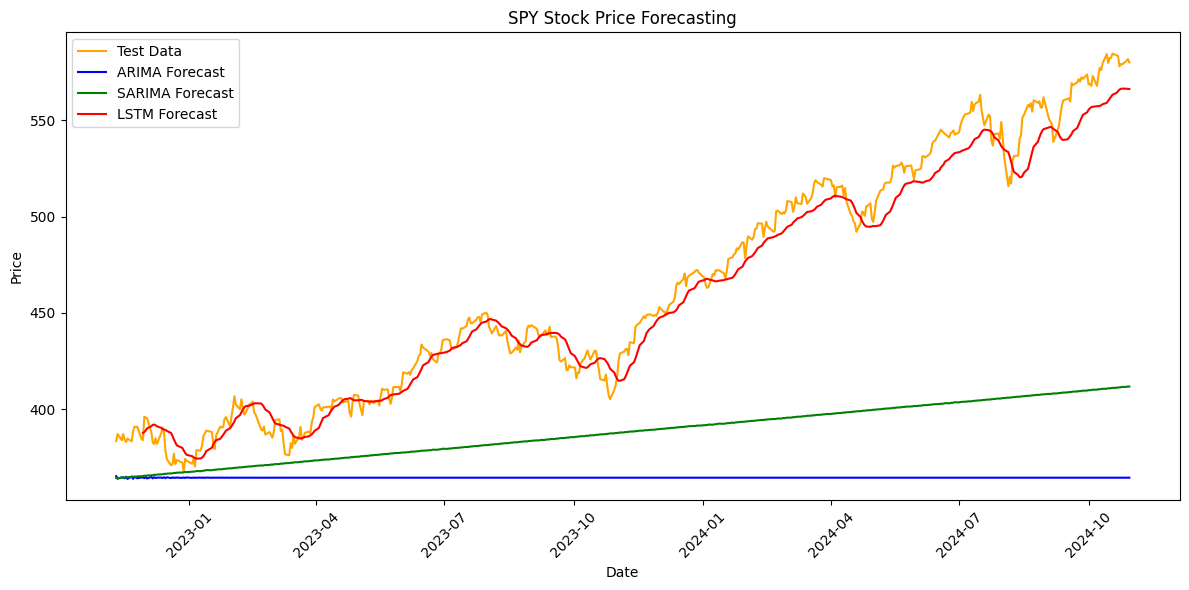

SPY ARIMA MAE: 98.6352, RMSE: 116.7922, MAPE: 19.89%
SPY SARIMA MAE: 75.0961, RMSE: 89.8183, MAPE: 15.10%
SPY LSTM MAE: 8.5520, RMSE: 10.5153, MAPE: 1.78%
Models for SPY saved successfully.



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

# Function to load data and prepare training/testing sets
def prepare_data(file_path, target_col='Adj Close', train_ratio=0.8):
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    print(f"Loaded {file_path}")
    print(data.head())
    
    train_size = int(len(data) * train_ratio)
    train, test = data[target_col][:train_size], data[target_col][train_size:]
    return data, train, test

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

# Custom MAPE function to handle zero/small values
def custom_mape(y_true, y_pred, epsilon=1e-10):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = (np.abs(y_true) > epsilon)
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# Function to train and evaluate models
def train_evaluate_models(train, test, data, file_prefix):
    # ARIMA model
    arima_model = pm.auto_arima(train, seasonal=False, trace=True, stepwise=True)
    arima_forecast = arima_model.predict(n_periods=len(test))
    
    mae_arima = mean_absolute_error(test, arima_forecast)
    rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
    mape_arima = custom_mape(test, arima_forecast)

    # SARIMA model
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
    sarima_model_fit = sarima_model.fit()
    sarima_forecast = sarima_model_fit.forecast(steps=len(test))
    
    mae_sarima = mean_absolute_error(test, sarima_forecast)
    rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
    mape_sarima = custom_mape(test, sarima_forecast)

    # LSTM model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))
    
    X, y = create_sequences(scaled_data)
    train_size = int(len(y) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(units=50),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    
    lstm_forecast = model.predict(X_test)
    
    # Inverse transform the predictions
    lstm_forecast = scaler.inverse_transform(lstm_forecast)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    mae_lstm = mean_absolute_error(y_test_inv, lstm_forecast)
    rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, lstm_forecast))
    mape_lstm = custom_mape(y_test_inv, lstm_forecast)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[len(train):], test, label='Test Data', color='orange')
    plt.plot(data.index[len(train):], arima_forecast, label='ARIMA Forecast', color='blue')
    plt.plot(data.index[len(train):], sarima_forecast, label='SARIMA Forecast', color='green')
    plt.plot(data.index[-len(y_test):], lstm_forecast, label='LSTM Forecast', color='red')
    plt.legend()
    plt.title(f'{file_prefix} Stock Price Forecasting')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print evaluation metrics
    print(f"{file_prefix} ARIMA MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")
    print(f"{file_prefix} SARIMA MAE: {mae_sarima:.4f}, RMSE: {rmse_sarima:.4f}, MAPE: {mape_sarima:.2f}%")
    print(f"{file_prefix} LSTM MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}, MAPE: {mape_lstm:.2f}%")
    
    # Save models
    joblib.dump(arima_model, f'../models/arima_spy_model_{file_prefix}.pkl')
    sarima_model_fit.save(f'../models/sarima_spy_model_{file_prefix}.pkl')
    model.save(f'../models/lstm_spy_model_{file_prefix}.keras')
    print(f"Models for {file_prefix} saved successfully.\n")

# Path to cleaned SPY dataset
spy_path = '../data/cleaned_SPY_data.csv'

# Training and evaluation for SPY
spy_data, spy_train, spy_test = prepare_data(spy_path)
train_evaluate_models(spy_train, spy_test, spy_data, 'SPY')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━

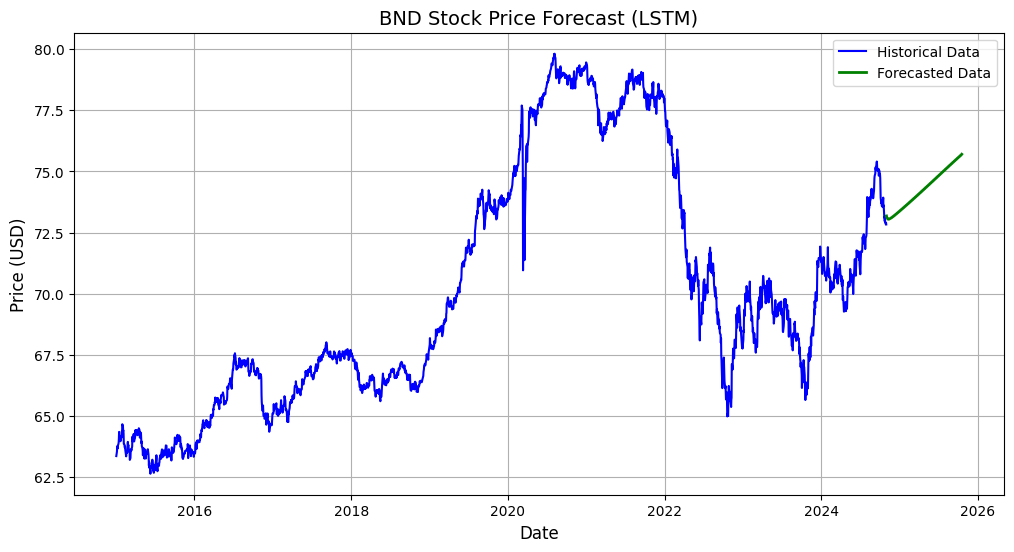

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the data
df = pd.read_csv('../data/cleaned_BND_data.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Preprocess the data for LSTM
# Assuming the 'Adj Close' is the column to forecast
data = df[['Adj Close']].copy()

# Step 3: Scale the data to [0,1] range using MinMaxScaler for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create the data structure with 60 time-steps (historical data) for training LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape data to fit LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Load the trained LSTM model
lstm_model = load_model('../models/lstm_bnd_model_BND.keras')

# Step 6: Forecast future prices (Next 252 days - 1 year)
forecast_periods = 252  # Forecast for 1 year (252 business days)
inputs = scaled_data[-60:].reshape(1, -1)  # Use the last 60 days of data as input

forecast_values = []
for i in range(forecast_periods):
    predicted_price = lstm_model.predict(inputs)
    forecast_values.append(predicted_price[0, 0])
    inputs = np.append(inputs[:, 1:], predicted_price, axis=1)  # Update the input for the next forecast

# Inverse scaling to get actual forecast values
forecast_values = np.array(forecast_values).reshape(-1, 1)
forecast_values = scaler.inverse_transform(forecast_values)

# Step 7: Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')  # Business days
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

# Step 8: Save the forecasted data to a CSV file
forecast_df.to_csv('../data/forecasted_bnd.csv')
print("Forecasted BND stock data saved as forecasted_bnd.csv")

# Step 9: Plotting the Historical Data and Forecasted Data
plt.figure(figsize=(12, 6))

# Plot the historical stock prices
plt.plot(df.index, df['Adj Close'], label='Historical Data', color='blue', linewidth=1.5)

# Plot the forecasted stock prices with thicker line width and green color
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='green', linewidth=2)

# Step 10: Add labels and title
plt.title('BND Stock Price Forecast (LSTM)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)

# Step 11: Show the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━

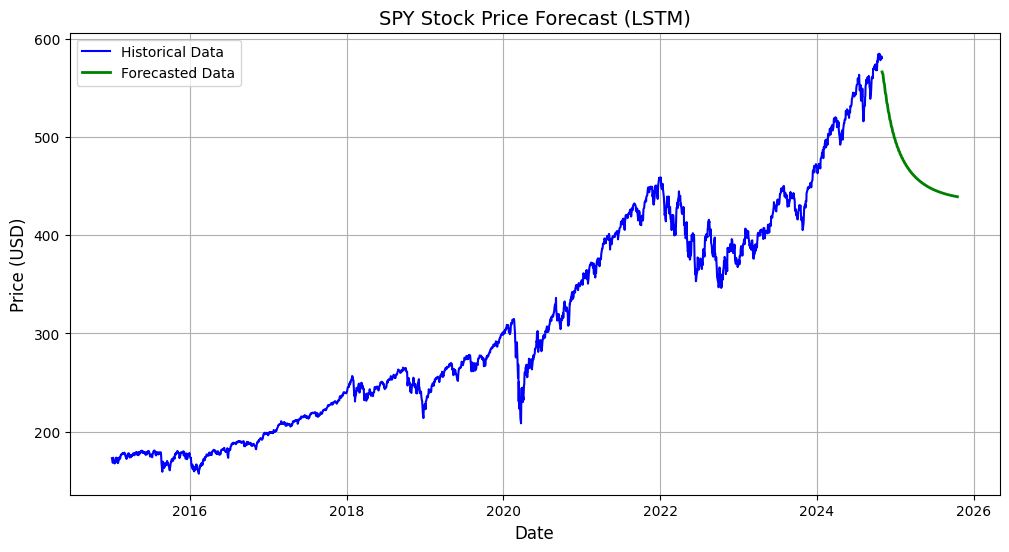

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the data
df = pd.read_csv('../data/cleaned_SPY_data.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Preprocess the data for LSTM
# Assuming the 'Adj Close' is the column to forecast
data = df[['Adj Close']].copy()

# Step 3: Scale the data to [0,1] range using MinMaxScaler for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create the data structure with 60 time-steps (historical data) for training LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape data to fit LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Load the trained LSTM model
lstm_model = load_model('../models/lstm_spy_model_SPY.keras')

# Step 6: Forecast future prices (Next 252 days - 1 year)
forecast_periods = 252  # Forecast for 1 year (252 business days)
inputs = scaled_data[-60:].reshape(1, -1)  # Use the last 60 days of data as input

forecast_values = []
for i in range(forecast_periods):
    predicted_price = lstm_model.predict(inputs)
    forecast_values.append(predicted_price[0, 0])
    inputs = np.append(inputs[:, 1:], predicted_price, axis=1)  # Update the input for the next forecast

# Inverse scaling to get actual forecast values
forecast_values = np.array(forecast_values).reshape(-1, 1)
forecast_values = scaler.inverse_transform(forecast_values)

# Step 7: Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')  # Business days
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

# Step 8: Save the forecasted data to a CSV file
forecast_df.to_csv('../data/forecasted_spy.csv')
print("Forecasted SPY stock data saved as forecasted_spy.csv")

# Step 9: Plotting the Historical Data and Forecasted Data
plt.figure(figsize=(12, 6))

# Plot the historical stock prices
plt.plot(df.index, df['Adj Close'], label='Historical Data', color='blue', linewidth=1.5)

# Plot the forecasted stock prices with thicker line width and green color
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='green', linewidth=2)

# Step 10: Add labels and title
plt.title('SPY Stock Price Forecast (LSTM)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)

# Step 11: Show the plot
plt.show()

In [36]:
# Load the historical Tesla data
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')

# Display the first few rows to understand its structure
tsla_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [37]:
# Convert 'Date' column to datetime format
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])

# Set 'Date' as the index
tsla_data.set_index('Date', inplace=True)

# Verify the data after setting the index
tsla_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [38]:
# Check for missing values
missing_values = tsla_data.isnull().sum()

# Display the number of missing values for each column
missing_values

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

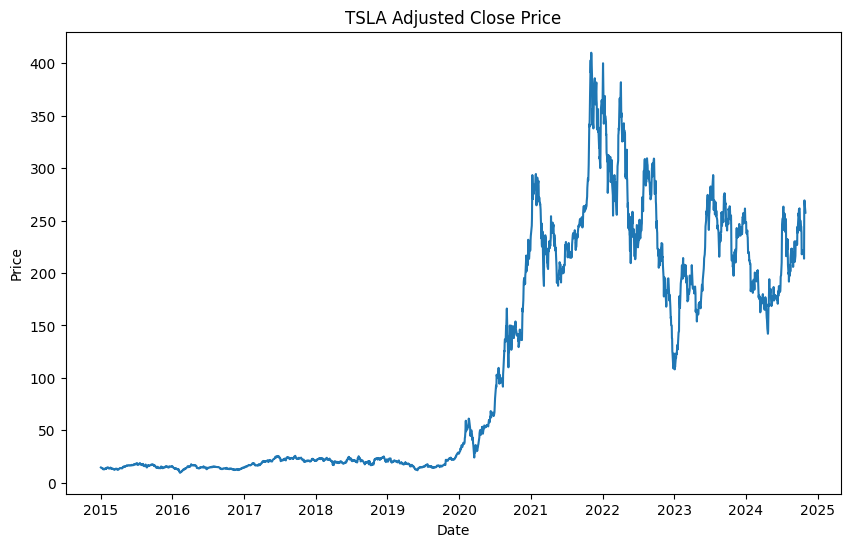

In [39]:
# Plot adjusted close prices
plt.figure(figsize=(10, 6))
plt.plot(tsla_data['Adj Close'])
plt.title('TSLA Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

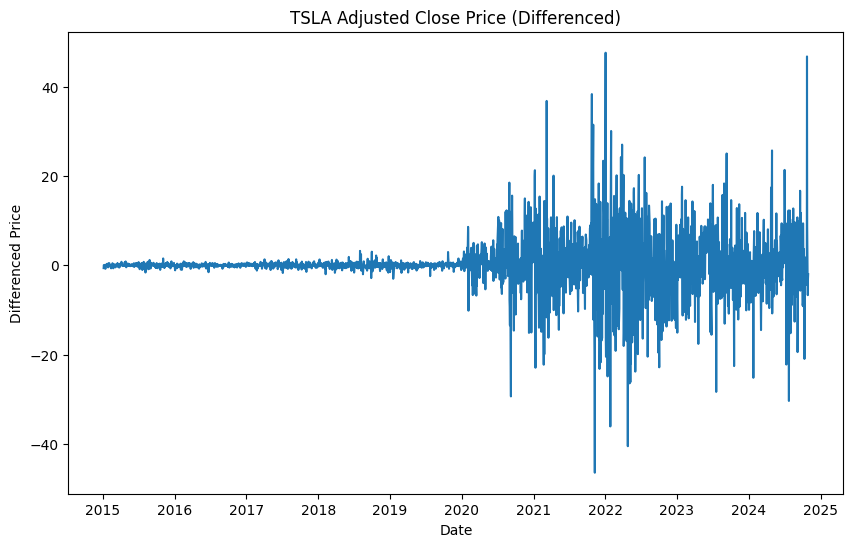

ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17


In [40]:
# First differencing to make the series stationary
tsla_data['Adj Close Differenced'] = tsla_data['Adj Close'].diff().dropna()

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(tsla_data['Adj Close Differenced'])
plt.title('TSLA Adjusted Close Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

# Check stationarity again after differencing
result = adfuller(tsla_data['Adj Close Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

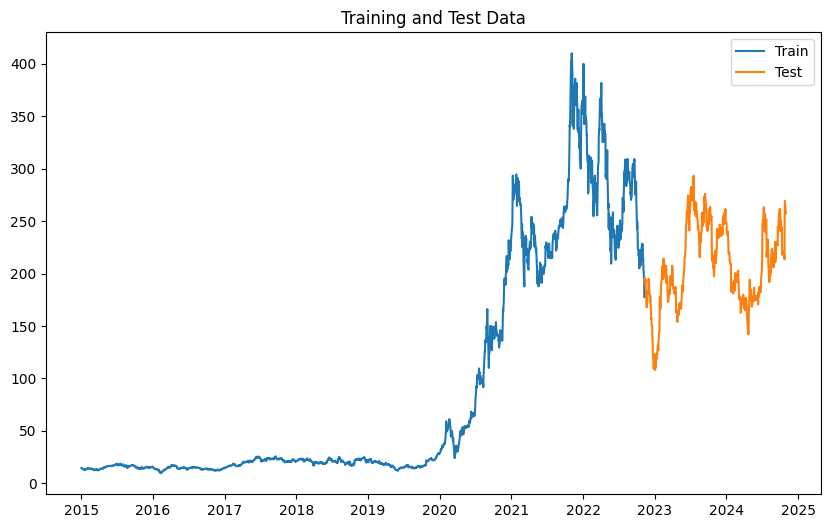

In [41]:
# Split the data into training and testing sets
train_size = int(len(tsla_data) * 0.8)  # 80% for training, 20% for testing
train, test = tsla_data['Adj Close'][:train_size], tsla_data['Adj Close'][train_size:]

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title('Training and Test Data')
plt.show()

                        Date  Adj Close      Close       High        Low  \
0  2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
1  2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2  2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
3  2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
4  2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

        Open    Volume  
0  14.858000  71466000  
1  14.303333  80527500  
2  14.004000  93928500  
3  14.223333  44526000  
4  14.187333  51637500  


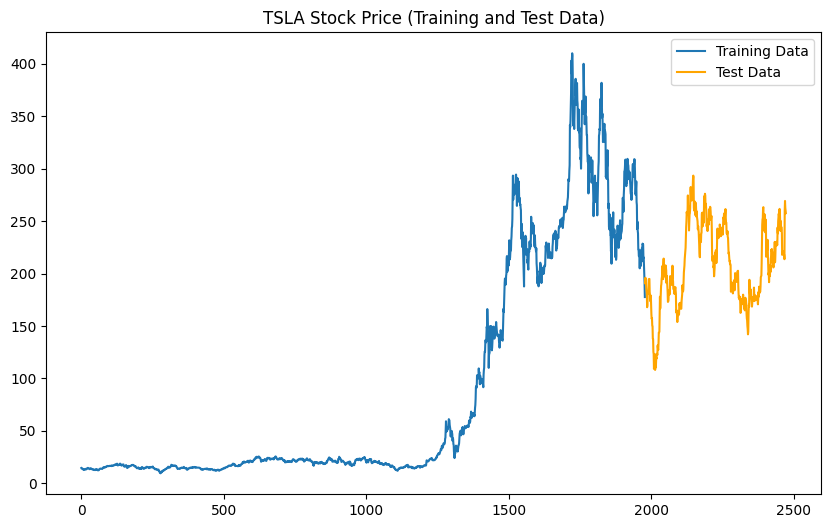

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=4.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.631 seconds
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1979
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6168.668
Date:                Tue, 12 Nov 2024   AIC                          12339.337
Time:                        17:06:45   BIC                          12344.927
Sample:                             0   HQIC                  

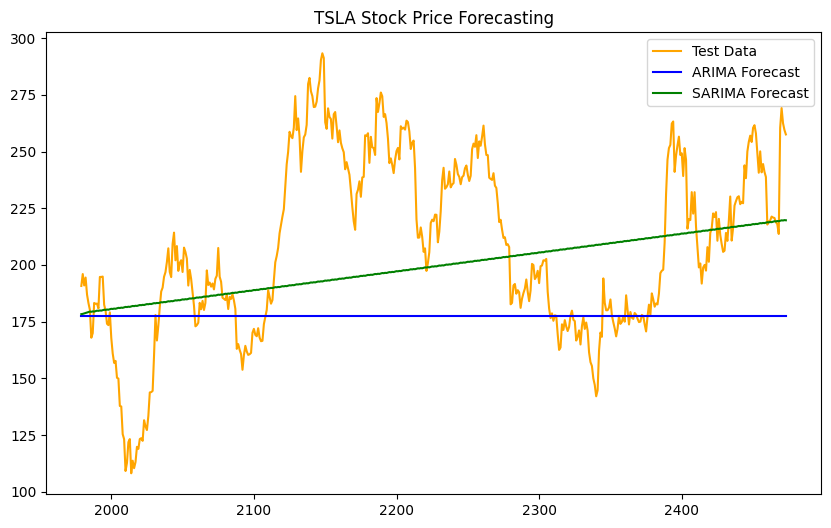

ARIMA MAE: 38.907052519827175, RMSE: 49.1129918969654, MAPE: 17.612209105913845%
SARIMA MAE: 31.108971542036564, RMSE: 38.24550825771493, MAPE: 15.178511350260596%
LSTM MAE: 0.029940049240023123, RMSE: 0.03675465955461941, MAPE: 20.419097639796167%


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

# Load the dataset
tsla_data = pd.read_csv('../data/cleaned_TSLA_data.csv')

# Display the first few rows
print(tsla_data.head())

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data['Adj Close'][:train_size], tsla_data['Adj Close'][train_size:]

# Visualize the split
plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index[:train_size], train, label='Training Data')
plt.plot(tsla_data.index[train_size:], test, label='Test Data', color='orange')
plt.legend()
plt.title('TSLA Stock Price (Training and Test Data)')
plt.show()

# Fit ARIMA model using auto_arima to find the best (p, d, q) parameters
arima_model = pm.auto_arima(train, seasonal=False, trace=True, stepwise=True)

# Print ARIMA model summary
print("ARIMA Model Summary:")
print(arima_model.summary())

# Forecast using ARIMA
arima_forecast = arima_model.predict(n_periods=len(test))

# Evaluate ARIMA performance
mae_arima = mean_absolute_error(test, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
mape_arima = np.mean(np.abs((test - arima_forecast) / test)) * 100


# Fit SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, m=5 for weekly seasonality)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
sarima_model_fit = sarima_model.fit()

# Print SARIMA model summary
print("SARIMA Model Summary:")
print(sarima_model_fit.summary())

# Forecast using SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Evaluate SARIMA performance
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
mape_sarima = np.mean(np.abs((test - sarima_forecast) / test)) * 100


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_data['Adj Close'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

# Create sequences for LSTM model
X, y = create_sequences(scaled_data)

# Split data into train and test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Forecast using LSTM
lstm_forecast = model.predict(X_test)

# Evaluate LSTM performance
mae_lstm = mean_absolute_error(y_test, lstm_forecast)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_forecast))
mape_lstm = np.mean(np.abs((y_test - lstm_forecast) / y_test)) * 100


plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index[train_size:], test, label='Test Data', color='orange')
plt.plot(tsla_data.index[train_size:], arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(tsla_data.index[train_size:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.title('TSLA Stock Price Forecasting')
plt.show()

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}%")
print(f"LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")

# Save ARIMA model
joblib.dump(arima_model, 'arima_model.pkl')

# Save SARIMA model
sarima_model_fit.save('sarima_model.pkl')

# Save LSTM model
model.save('lstm_model.keras')

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - loss: 0.0259
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0014
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0012
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0010
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 8.9496e-04
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 7.3555e-04
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 7.6078e-04
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 8.4745e-04
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 6.1543e-04
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 5.7452e-04


LSTM model saved as 'lstm_model.h5'


LSTM model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━

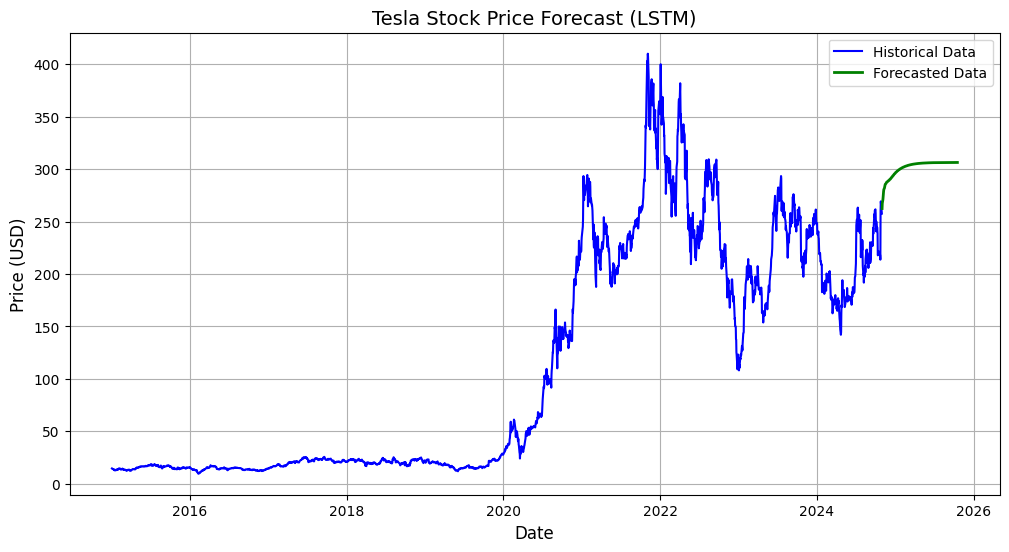

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Step 1: Load the data (Tesla stock data)
df = pd.read_csv('../data/cleaned_TSLA_data.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Prepare the data
# Use only the 'Adj Close' column for forecasting
data = df[['Adj Close']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences of 60 days for the LSTM model input
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Use previous 60 days as features
        y.append(data[i, 0])  # Predict the next day
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled)

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer with 1 unit for price prediction
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Step 4: Save the trained LSTM model
model.save('../models/lstm_model.h5')
print("LSTM model saved as 'lstm_model.h5'")

# Step 5: Load the trained LSTM model
model = load_model('../models/lstm_model.h5')
print("LSTM model loaded successfully")

# Step 6: Forecast Future Prices (252 business days)
forecast_periods = 252  # Forecast for 1 year (252 business days)

# Prepare the data for the forecast (use the last 60 days for initial prediction)
last_60_days = data_scaled[-60:].reshape(1, -1)
last_60_days = last_60_days.reshape((1, 60, 1))

forecast_values = []
for _ in range(forecast_periods):
    # Predict the next price using the LSTM model
    predicted_price = model.predict(last_60_days)[0][0]
    forecast_values.append(predicted_price)

    # Update the last_60_days array with the new predicted value
    predicted_price_reshaped = predicted_price.reshape(1, 1, 1)  # Reshape predicted price for LSTM input (1 sample, 1 time step, 1 feature)
    last_60_days = np.append(last_60_days[:, 1:, :], predicted_price_reshaped, axis=1)


# Inverse transform the forecasted data to the original scale
forecast_values = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1))

# Step 7: Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')  # Business days
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])

# Step 8: Save the forecasted data to a CSV file
forecast_df.to_csv('../data/forecasted_tsla_lstm.csv')
print("Forecasted Tesla stock data saved as forecasted_tsla_lstm.csv")

# Step 9: Plotting the Historical Data and Forecasted Data
plt.figure(figsize=(12, 6))

# Plot the historical stock prices
plt.plot(df.index, df['Adj Close'], label='Historical Data', color='blue', linewidth=1.5)

# Plot the forecasted stock prices with thicker line width and green color
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='green', linewidth=2)

# Step 10: Add labels and title
plt.title('Tesla Stock Price Forecast (LSTM)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)

# Step 11: Show the plot
plt.show()


### Portfolio

In [51]:
import pandas as pd

# Load data without specifying index_col to see available columns
tsla_forecast = pd.read_csv('../data/forecasted_tsla.csv')
print(tsla_forecast.columns)

bnd_forecast = pd.read_csv('../data/forecasted_bnd.csv')
print(bnd_forecast.columns)

spy_forecast = pd.read_csv('../data/forecasted_spy.csv')
print(spy_forecast.columns)

Index(['Unnamed: 0', 'Forecast'], dtype='object')
Index(['Unnamed: 0', 'Forecast'], dtype='object')
Index(['Unnamed: 0', 'Forecast'], dtype='object')


In [54]:
import pandas as pd

# Load the forecasted data
tsla_forecast = pd.read_csv('../data/forecasted_tsla.csv')
bnd_forecast = pd.read_csv('../data/forecasted_bnd.csv')
spy_forecast = pd.read_csv('../data/forecasted_spy.csv')

# Rename 'Unnamed: 0' to 'Date' in each DataFrame
tsla_forecast.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
bnd_forecast.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
spy_forecast.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Save the datasets with the new column name
tsla_forecast.to_csv('../data/forecasted_tsla_renamed.csv', index=False)
bnd_forecast.to_csv('../data/forecasted_bnd_renamed.csv', index=False)
spy_forecast.to_csv('../data/forecasted_spy_renamed.csv', index=False)

print("Columns renamed and datasets saved.")

Columns renamed and datasets saved.


In [55]:
import pandas as pd

# Load forecasted data
tsla_forecast = pd.read_csv('../data/forecasted_tsla_renamed.csv', index_col='Date', parse_dates=True)
bnd_forecast = pd.read_csv('../data/forecasted_bnd_renamed.csv', index_col='Date', parse_dates=True)
spy_forecast = pd.read_csv('../data/forecasted_spy_renamed.csv', index_col='Date', parse_dates=True)

# Combine data into one DataFrame
df = pd.DataFrame({
    'TSLA': tsla_forecast['Forecast'],
    'BND': bnd_forecast['Forecast'],
    'SPY': spy_forecast['Forecast']
})
df = df.dropna()  # Remove any rows with missing values

### Daily and Annual Returns for Each Asset

In [ ]:
# Calculate daily returns
daily_returns = df.pct_change().dropna()
daily_returns
# Calculate annualized returns (252 trading days per year)
annual_returns = daily_returns.mean() * 252
annual_returns

TSLA    0.155878
BND     0.034031
SPY    -0.254713
dtype: float64

### Covariance Matrix for Portfolio Risk Analysis

In [59]:
# Calculate covariance matrix of daily returns
cov_matrix = daily_returns.cov() * 252  # Annualize the covariance
cov_matrix

,TSLA,BND,SPY
TSLA,0.000902,-0.000037,-0.000247
BND,-0.000037,0.000002,0.000007
SPY,-0.000247,0.000007,0.000277


### Portfolio Weights and Calculate Portfolio Metrics

In [60]:
import numpy as np

# initial weights (equal allocation)
weights = np.array([0.33, 0.33, 0.34])

# Calculate portfolio return
portfolio_return = np.dot(weights, annual_returns)

# Calculate portfolio risk (volatility)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Sharpe Ratio (assuming a risk-free rate of 0.5%)
risk_free_rate = 0.005
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

In [61]:
sharpe_ratio

-3.497486402430155

### Optimize Portfolio Weights to Maximize Sharpe Ratio

In [62]:
from scipy.optimize import minimize

# Function to calculate negative Sharpe Ratio (for minimization)
def neg_sharpe(weights):
    port_return = np.dot(weights, annual_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(port_return - risk_free_rate) / port_volatility

# Constraints: weights sum to 1, bounds [0, 1] for each weight
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = [(0, 1) for _ in range(len(weights))]

# Optimize
optimized = minimize(neg_sharpe, weights, bounds=bounds, constraints=constraints)
optimal_weights = optimized.x

In [66]:
optimized

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -204.00626103154426
       x: [ 4.262e-02  9.455e-01  1.192e-02]
     nit: 15
     jac: [-3.293e+01 -3.315e+01 -3.289e+01]
    nfev: 74
    njev: 15

In [67]:
optimal_weights

array([0.0426158 , 0.94546022, 0.01192399])

### Analyze Portfolio Risk and Return Metrics

In [63]:
# Optimized portfolio return, volatility, and Sharpe Ratio
optimized_return = np.dot(optimal_weights, annual_returns)
optimized_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
optimized_sharpe_ratio = (optimized_return - risk_free_rate) / optimized_volatility

print(f"Optimized Portfolio Return: {optimized_return:.2%}")
print(f"Optimized Portfolio Volatility: {optimized_volatility:.2%}")
print(f"Optimized Sharpe Ratio: {optimized_sharpe_ratio:.2f}")
print(f"Optimal Weights: TSLA: {optimal_weights[0]:.2%}, BND: {optimal_weights[1]:.2%}, SPY: {optimal_weights[2]:.2%}")

Optimized Portfolio Return: 3.58%
Optimized Portfolio Volatility: 0.02%
Optimized Sharpe Ratio: 204.01
Optimal Weights: TSLA: 4.26%, BND: 94.55%, SPY: 1.19%


### Visualize Portfolio Performance

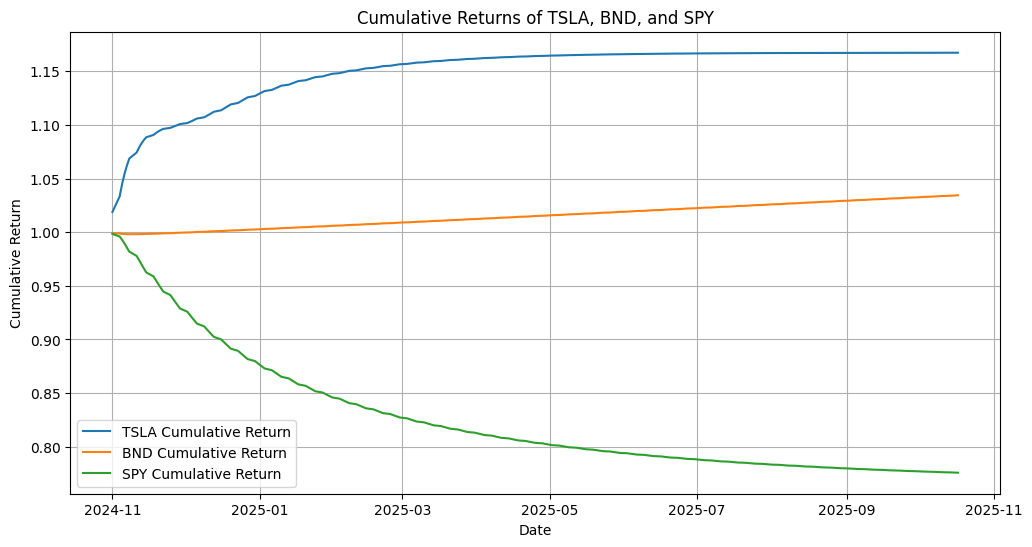

In [64]:
import matplotlib.pyplot as plt

# Calculate cumulative returns for each asset
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns for each asset
plt.figure(figsize=(12, 6))
for asset in df.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[asset], label=f'{asset} Cumulative Return')
    
# Customize the plot
plt.title('Cumulative Returns of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

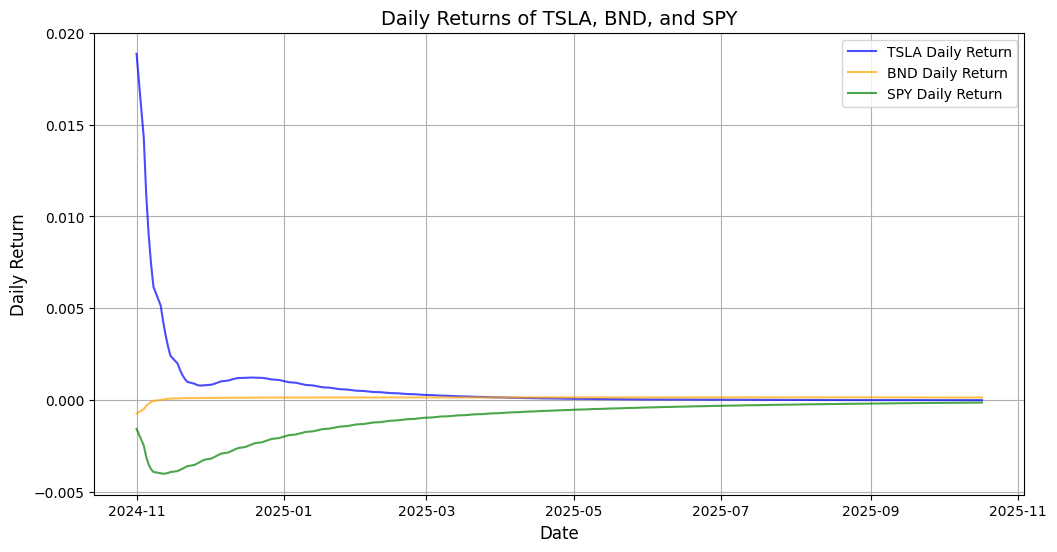

In [65]:
# Calculate daily returns (percentage change)
returns = df.pct_change().dropna()

# Plot the daily returns for TSLA, BND, and SPY
plt.figure(figsize=(12, 6))

# Plot each asset's daily returns
plt.plot(returns.index, returns['TSLA'], label='TSLA Daily Return', color='blue', alpha=0.7)
plt.plot(returns.index, returns['BND'], label='BND Daily Return', color='orange', alpha=0.7)
plt.plot(returns.index, returns['SPY'], label='SPY Daily Return', color='green', alpha=0.7)

# Adding labels and title
plt.title('Daily Returns of TSLA, BND, and SPY', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.legend()

# Show gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()